# Assignment 7 - Stats & Modeling

Spurthi Rallapalli, DH 140 W22

# **Step 1: Make a new Jupyter notebook.** Done!

# **Step 2: Using the same Shakespeare play from your Week 6 Assignment**

For this assigment, I will analyze *Romeo and Juliet* like I did in Assignment 6. I found the plain text UTF-8 file on the Projet Gutenberg website at this link: https://www.gutenberg.org/cache/epub/1513/pg1513.txt. I will actually be using a different way to obtain the contents than I did last time. Last week, I used requests, but along with the text of the play came a bunch of text from Project Gutenberg itself, which I did not want. So this time, I will download the file, clean up some of the information, and then open() like we did with Macbeth.

The file is called RomeoandJuliet.txt.

In [1]:
with open('RomeoandJuliet.txt','r') as f:
    romeoandjuliet = f.read()

In [2]:
# Check to see if it was read in properly
romeoandjuliet

'THE TRAGEDY OF ROMEO AND JULIET\n\n\n\nby William Shakespeare\n\n\nContents\n\nTHE PROLOGUE.\n\nACT I\nScene I. A public place.\nScene II. A Street.\nScene III. Room in Capulet’s House.\nScene IV. A Street.\nScene V. A Hall in Capulet’s House.\n\n\nACT II\nCHORUS.\nScene I. An open place adjoining Capulet’s Garden.\nScene II. Capulet’s Garden.\nScene III. Friar Lawrence’s Cell.\nScene IV. A Street.\nScene V. Capulet’s Garden.\nScene VI. Friar Lawrence’s Cell.\n\n\nACT III\nScene I. A public Place.\nScene II. A Room in Capulet’s House.\nScene III. Friar Lawrence’s cell.\nScene IV. A Room in Capulet’s House.\nScene V. An open Gallery to Juliet’s Chamber, overlooking the Garden.\n\n\nACT IV\nScene I. Friar Lawrence’s Cell.\nScene II. Hall in Capulet’s House.\nScene III. Juliet’s Chamber.\nScene IV. Hall in Capulet’s House.\nScene V. Juliet’s Chamber; Juliet on the bed.\n\n\nACT V\nScene I. Mantua. A Street.\nScene II. Friar Lawrence’s Cell.\nScene III. A churchyard; in it a Monument belo

In [3]:
# All of the imports we need

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from string import punctuation
import numpy as np
import pandas as pd

Tokenize the words, remove stopwords, stem or lemmatize the words, and calculate the word frequencies

In [4]:
# Tokenize the words
words = word_tokenize(romeoandjuliet.lower().replace('th’','the'))

In [5]:
# Remove stopwords
myStopWords = list(punctuation) + stopwords.words('english')
completewords = [w for w in words if w not in myStopWords or w in ['the']]

In [6]:
print(completewords[:50])

['the', 'tragedy', 'romeo', 'juliet', 'william', 'shakespeare', 'contents', 'the', 'prologue', 'act', 'scene', 'i.', 'public', 'place', 'scene', 'ii', 'street', 'scene', 'iii', 'room', 'capulet', '’', 'house', 'scene', 'iv', 'street', 'scene', 'v.', 'hall', 'capulet', '’', 'house', 'act', 'ii', 'chorus', 'scene', 'i.', 'open', 'place', 'adjoining', 'capulet', '’', 'garden', 'scene', 'ii', 'capulet', '’', 'garden', 'scene', 'iii']


In [7]:
# After looking at this list, I realized there's a couple more stop words I want to add

morestopwords = []
morestopwords.append('’')
morestopwords.append('i.')
morestopwords.append('i')
morestopwords.append('ii.')
morestopwords.append('ii')
morestopwords.append('iii.')
morestopwords.append('iii')
morestopwords.append('iv.')
morestopwords.append('iv')
morestopwords.append('v.')
morestopwords.append('v')
morestopwords.append('vi.')
morestopwords.append('vi')

In [8]:
myStopWords = list(punctuation) + stopwords.words('english') + morestopwords
completewords = [w for w in words if w not in myStopWords or w in ['the']]

In [9]:
print(completewords[:100])

['the', 'tragedy', 'romeo', 'juliet', 'william', 'shakespeare', 'contents', 'the', 'prologue', 'act', 'scene', 'public', 'place', 'scene', 'street', 'scene', 'room', 'capulet', 'house', 'scene', 'street', 'scene', 'hall', 'capulet', 'house', 'act', 'chorus', 'scene', 'open', 'place', 'adjoining', 'capulet', 'garden', 'scene', 'capulet', 'garden', 'scene', 'friar', 'lawrence', 'cell', 'scene', 'street', 'scene', 'capulet', 'garden', 'scene', 'friar', 'lawrence', 'cell', 'act', 'scene', 'public', 'place', 'scene', 'room', 'capulet', 'house', 'scene', 'friar', 'lawrence', 'cell', 'scene', 'room', 'capulet', 'house', 'scene', 'open', 'gallery', 'juliet', 'chamber', 'overlooking', 'the', 'garden', 'act', 'scene', 'friar', 'lawrence', 'cell', 'scene', 'hall', 'capulet', 'house', 'scene', 'juliet', 'chamber', 'scene', 'hall', 'capulet', 'house', 'scene', 'juliet', 'chamber', 'juliet', 'the', 'bed', 'act', 'scene', 'mantua', 'street', 'scene']


In [10]:
# Stem the words
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]

In [11]:
print(completestemmed[:100])

['the', 'tragedy', 'romeo', 'juliet', 'william', 'shakespeare', 'content', 'the', 'prologue', 'act', 'scene', 'public', 'place', 'scene', 'street', 'scene', 'room', 'capulet', 'house', 'scene', 'street', 'scene', 'hall', 'capulet', 'house', 'act', 'chorus', 'scene', 'open', 'place', 'adjoining', 'capulet', 'garden', 'scene', 'capulet', 'garden', 'scene', 'friar', 'lawrence', 'cell', 'scene', 'street', 'scene', 'capulet', 'garden', 'scene', 'friar', 'lawrence', 'cell', 'act', 'scene', 'public', 'place', 'scene', 'room', 'capulet', 'house', 'scene', 'friar', 'lawrence', 'cell', 'scene', 'room', 'capulet', 'house', 'scene', 'open', 'gallery', 'juliet', 'chamber', 'overlooking', 'the', 'garden', 'act', 'scene', 'friar', 'lawrence', 'cell', 'scene', 'hall', 'capulet', 'house', 'scene', 'juliet', 'chamber', 'scene', 'hall', 'capulet', 'house', 'scene', 'juliet', 'chamber', 'juliet', 'the', 'bed', 'act', 'scene', 'mantua', 'street', 'scene']


In [12]:
# Calculate the word frequencies
rjfreq = FreqDist(completestemmed)

wordlist = []
wordfreq = []
for i in sorted(rjfreq, key=rjfreq.get, reverse=True):
    wordlist.append(i)
    wordfreq.append(rjfreq[i])
    
df = pd.DataFrame({'wordlist':wordlist,'wordfreq':wordfreq})

In [13]:
df

,wordlist,wordfreq
0,the,687
1,romeo,313
2,thou,278
3,juliet,188
4,thy,170
...,...,...
3303,while,1
3304,figure,1
3305,sacrifice,1
3306,glooming,1


For the word frequencies, calculate the mean, median, mode, and trimmed mean.

In [14]:
# mean
rjmean = df["wordfreq"].mean()
rjmean

4.547460701330109

In [15]:
rjmedian = df["wordfreq"].median()
rjmedian

1.0

In [16]:
# mode is the wordfreq value at the top of the dataframe
rjmode = df["wordfreq"].mode()
rjmode

0    1
dtype: int64

In [17]:
# trimmed mean, I chose to remove any frequencies about 300 and below 10
df2 = df[df['wordfreq']<300]
df3 = df2[df2['wordfreq']>10]
df3

,wordlist,wordfreq
2,thou,278
3,juliet,188
4,thy,170
5,capulet,163
6,love,151
...,...,...
262,alack,11
263,pardon,11
264,full,11
265,bring,11


In [18]:
rjtrimmedmean = df3["wordfreq"].mean()
rjtrimmedmean

29.939622641509434

Plot a histogram of the word frequency data and comment on the relative locations of the mean, median, mode, and trimmed mean.

<AxesSubplot:ylabel='Frequency'>

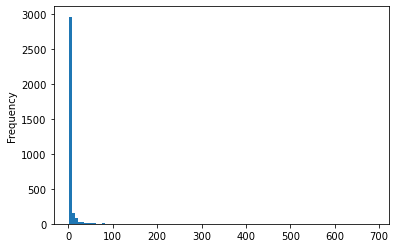

In [19]:
df['wordfreq'].plot(kind='hist', bins=100)

This histogram seems pretty accurate to the values of mean, median, mode, and trimmed mode. We can see that there were a lot of words in the 0-10 range frequency, which is why when we trimmed the mean to not include frequencies from 0 to 10, the trimmed mean skyrocketted. 

# **Step 3: Foray into machine learning**

In [2]:
from sklearn import datasets

In [3]:
df = datasets.load_diabetes(as_frame=True)

In [4]:
features_df = df.data

In [5]:
target_df = df.target

In [6]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Do some exploratory data analysis of the features, including getting summary statistical information

In [27]:
df

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

**Quickly glancing through this, I noticed that some of the numbers might be weird (ie, age is a number under 0 years). Then, I found a line above which might explain this: "Each of these 10 feature variables have been mean centered and scaled by the standard deviation times 'n_samples'"**

In [7]:
features_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [8]:
target_df

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [9]:
# Some prelimiary analysis of features

agemean = features_df["age"].mean()
agemedian = features_df["age"].median()

bmimean = features_df["bmi"].mean()
bmimedian = features_df["bmi"].median()

print("Age mean: ", agemean)
print("Age median: ", agemedian)
print("BMI mean: ", bmimean)
print("BMI median: ", bmimedian)

Age mean:  -3.6342849293088766e-16
Age median:  0.00538306037424807
BMI mean:  -8.045349203335693e-16
BMI median:  -0.00728376620968916


Find the column in features_df that has the highest correlation coefficient with the target values in target_df

In [33]:
#df[['frame.age','frame.target']].corr()
#df[data.age]
#df.frame.age
df.frame.columns
df2 = df.frame
df2
#df[['metrics.difficulty.gunning fog','metrics.statistics.average sentence length']].corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


After MUCH trial and error, I figured out that all the data values were in the df.frame and that I had to reassign it to a different dataframe (df2) in order to get all the values on one table.

In [35]:
df2[['age','target']].corr()

,age,target
age,1.000000,0.187889
target,0.187889,1.000000


In [36]:
df2[['sex','target']].corr()

,sex,target
sex,1.000000,0.043062
target,0.043062,1.000000


In [37]:
df2[['bmi','target']].corr()

,bmi,target
bmi,1.00000,0.58645
target,0.58645,1.00000


In [38]:
df2[['bp','target']].corr()

,bp,target
bp,1.000000,0.441484
target,0.441484,1.000000


In [39]:
df2[['s1','target']].corr()

,s1,target
s1,1.000000,0.212022
target,0.212022,1.000000


In [40]:
df2[['s2','target']].corr()

,s2,target
s2,1.000000,0.174054
target,0.174054,1.000000


In [41]:
df2[['s3','target']].corr()

,s3,target
s3,1.000000,-0.394789
target,-0.394789,1.000000


In [42]:
df2[['s4','target']].corr()

,s4,target
s4,1.000000,0.430453
target,0.430453,1.000000


In [43]:
df2[['s5','target']].corr()

,s5,target
s5,1.000000,0.565883
target,0.565883,1.000000


In [44]:
df2[['s6','target']].corr()

,s6,target
s6,1.000000,0.382483
target,0.382483,1.000000


So based on this, it seems like **BMI and target** have the highest correlation value at 0.586.

Make a scatter plot of the target values vs this feature column's values and comment on how the plotted points match up with the correlation coefficient.

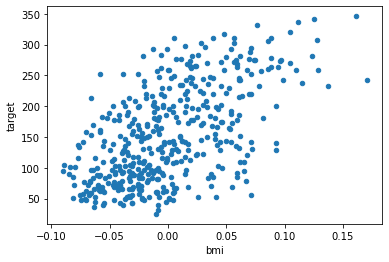

In [45]:
df2.plot(kind='scatter',
        x='bmi',
        y='target');

The dots are pretty spread out, but it has a general upwards trend. This makes sense, because the correlation coefficient is positive and pretty high, but not close enough to 1 to show a very strong correlation.

Using this feature and target, perform linear regression with sklearn's LinearRegression.

In [46]:
# Imports for LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
X = df2[['bmi']]
y = df2['target']

In [48]:
reg = LinearRegression().fit(X, y)

Print the coefficients of the model

In [49]:
reg.coef_

array([949.43526038])

In [50]:
reg.intercept_

152.1334841628967

In [60]:
ytrain = reg.intercept_ + reg.coef_ * X

Plot the linear fit on top of the scatter plot

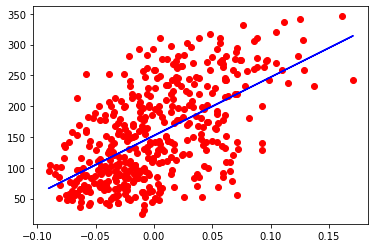

In [52]:
plt.plot(X,y,'ro',X,ytrain,'b-');

Calculate (or output) the mean squared error and R-squared values for your fit

In [53]:
mean_squared_error(y, ytrain)

3890.4565854612724

In [54]:
r2_score(y, ytrain)

0.3439237602253803

The numbers are pretty high because the correlation is pretty low, the bmi values are pretty small, and target values are very high, which makes sense :) 

Now trying it with a different value, I expect mean squared error to be larger. 

In [55]:
X2 = df2[['age']]
y = df2['target']

In [57]:
reg2 = LinearRegression().fit(X2, y)

In [58]:
reg2.coef_

array([304.18307453])

In [59]:
reg2.intercept_

152.13348416289605

In [61]:
ytrain2 = reg2.intercept_ + reg2.coef_ * X2

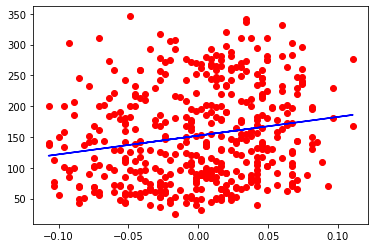

In [62]:
plt.plot(X2,y,'ro',X2,ytrain2,'b-');

In [63]:
mean_squared_error(y, ytrain2)

5720.5470172056475

In [64]:
r2_score(y, ytrain2)

0.03530218264671636

Like a predicted, the mean squared error was larger!